In [1]:
import pandas as pd
import numpy as np
from numpy import array
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import regularizers
from matplotlib import pyplot
from sklearn.model_selection import KFold
import openpyxl
import os
import tensorflow as tf
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
X=pd.read_excel(open('t.xlsx', 'rb'),sheet_name='最终数据集',usecols=[1,2,3,4,5])
Y=pd.read_excel(open('t.xlsx', 'rb'),sheet_name='最终数据集', usecols=[6])

In [3]:
X
mm = MinMaxScaler()
X = mm.fit_transform(X)
X

array([[4.51309060e-03, 6.92956613e-01, 9.00893032e-01, 2.99035605e-01,
        0.00000000e+00],
       [1.72762148e-03, 7.61284971e-01, 8.18152035e-01, 2.87403338e-01,
        0.00000000e+00],
       [9.69722793e-03, 7.42928911e-01, 8.25046358e-01, 2.31613408e-01,
        0.00000000e+00],
       ...,
       [9.49731426e-06, 7.01200396e-01, 7.15529465e-01, 7.88507970e-02,
        0.00000000e+00],
       [9.59948855e-06, 5.62205664e-01, 7.61000940e-01, 1.08321132e-01,
        0.00000000e+00],
       [5.49939083e-05, 8.65418149e-01, 7.96174257e-01, 9.36803535e-02,
        0.00000000e+00]])

In [4]:
Y = mm.fit_transform(Y)
Y

array([[0.1242358 ],
       [0.03740689],
       [0.40791365],
       ...,
       [0.02822565],
       [0.01971066],
       [0.3388823 ]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=1)

In [6]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(3175, 1059, 3175, 1059)

In [7]:
X=X_train
Y=Y_train

In [8]:
len(X),len(Y)

(3175, 3175)

In [9]:
#1
# 定义10折交叉验证
kf = KFold(n_splits=10)

fold_no = 1
average_score = 0
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential()
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(4,activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}')

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.01892523095011711
Score for fold 2: loss of 0.023499848321080208
Score for fold 3: loss of 0.021080011501908302
Score for fold 4: loss of 0.02161267399787903
Score for fold 5: loss of 0.022842036560177803
Score for fold 6: loss of 0.020630206912755966
Score for fold 7: loss of 0.022175606340169907
Score for fold 8: loss of 0.02284662425518036
Score for fold 9: loss of 0.026432620361447334
Score for fold 10: loss of 0.0241570882499218
average_score: 0.022420194745063782


In [88]:
from keras.optimizers import adam_v2
model=Sequential() #初始化模型
model.add(Dense(32,input_shape=(5,),activation='tanh'))#添加一个隐含层，注：只是第一个隐含层需指定input_dim
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(1)) #添加输出层
model.compile(loss='mse', optimizer='adam')  # 编译，指定目标函数与优化方法
history = model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),batch_size=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.0430 - val_loss: 0.0302
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.0262
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0256
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0254
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.0252
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0252
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.0253
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0252
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0251
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0253
Epoch 11/

In [89]:
loss=history.history['loss']
val_loss=history.history['val_loss']

In [90]:
np.savetxt('loss.txt',loss,fmt='%f')
np.savetxt('val_loss.txt',val_loss,fmt='%f')

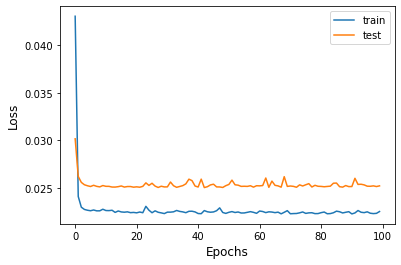

In [91]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs', fontsize = 12)
pyplot.ylabel('Loss', fontsize = 12)
pyplot.savefig("./loss.png")

In [92]:
prediction_y = model.predict(X_test)

In [93]:
Y_pre=mm.inverse_transform(prediction_y)

In [97]:
Y_real=mm.inverse_transform(Y_test)

In [98]:
cha=Y_pre-Y_real

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_real, Y_pre)
mse = mean_squared_error(Y_real, Y_pre)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)

Test MAE: 1.054
Test MSE: 2.059


In [100]:
from math import sqrt
rmse = sqrt(mean_squared_error(Y_real, Y_pre))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.435


In [64]:
def MAPE(Y_real,Y_pre):#计算mape
    return np.mean(np.abs((Y_real - Y_pre) / Y_real)) * 100

In [65]:
mape=MAPE(Y_real, Y_pre)

In [66]:
mape

374.9015721408781

In [23]:
#2
from sklearn.model_selection import KFold


# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.019407425075769424
Score for fold 2: loss of 0.02353452891111374
Score for fold 3: loss of 0.021221529692411423
Score for fold 4: loss of 0.021424032747745514
Score for fold 5: loss of 0.023078657686710358
Score for fold 6: loss of 0.020592575892806053
Score for fold 7: loss of 0.02283821441233158
Score for fold 8: loss of 0.022705266252160072
Score for fold 9: loss of 0.026860138401389122
Score for fold 10: loss of 0.024046458303928375
average_score: 0.022570882737636567


In [24]:
#3
from sklearn.model_selection import KFold


# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(16,input_shape=(5,),activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.019006749615073204
Score for fold 2: loss of 0.024016454815864563
Score for fold 3: loss of 0.02143840119242668
Score for fold 4: loss of 0.021376892924308777
Score for fold 5: loss of 0.02288568764925003
Score for fold 6: loss of 0.02071939967572689
Score for fold 7: loss of 0.022322535514831543
Score for fold 8: loss of 0.022837631404399872
Score for fold 9: loss of 0.026804903522133827
Score for fold 10: loss of 0.024694224819540977
average_score: 0.022610288113355637


In [25]:
#4
from keras import optimizers
from sklearn.model_selection import KFold
from keras.optimizers import adam_v2

# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(4,activation='tanh'))
    model.add(Dense(1))
    adam = optimizers.adam_v2.Adam(lr=0.0001)
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

D:\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Score for fold 1: loss of 0.019128622487187386
Score for fold 2: loss of 0.023645853623747826
Score for fold 3: loss of 0.0209127776324749
Score for fold 4: loss of 0.021620282903313637
Score for fold 5: loss of 0.02341899648308754
Score for fold 6: loss of 0.020603926852345467
Score for fold 7: loss of 0.022236015647649765
Score for fold 8: loss of 0.02295037917792797
Score for fold 9: loss of 0.02671905793249607
Score for fold 10: loss of 0.026247205212712288
average_score: 0.022748311795294286


In [26]:
#5
from keras import optimizers
from sklearn.model_selection import KFold
from keras.optimizers import adam_v2
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    adam = optimizers.adam_v2.Adam(lr=0.0001)
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.018839877098798752
Score for fold 2: loss of 0.02384530007839203
Score for fold 3: loss of 0.020982468500733376
Score for fold 4: loss of 0.021452276036143303
Score for fold 5: loss of 0.02300938405096531
Score for fold 6: loss of 0.020739024505019188
Score for fold 7: loss of 0.022146150469779968
Score for fold 8: loss of 0.023190705105662346
Score for fold 9: loss of 0.02674025483429432
Score for fold 10: loss of 0.024442508816719055
average_score: 0.022538794949650765


In [27]:
#6
from keras import optimizers
from sklearn.model_selection import KFold
from keras.optimizers import adam_v2
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(16,input_shape=(5,),activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    adam = optimizers.adam_v2.Adam(lr=0.0001)
    model.compile(loss='mse', optimizer='adam')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.01884976029396057
Score for fold 2: loss of 0.02388474904000759
Score for fold 3: loss of 0.021149827167391777
Score for fold 4: loss of 0.021748069673776627
Score for fold 5: loss of 0.022698499262332916
Score for fold 6: loss of 0.02049705944955349
Score for fold 7: loss of 0.022254785522818565
Score for fold 8: loss of 0.02267690934240818
Score for fold 9: loss of 0.026957908645272255
Score for fold 10: loss of 0.02405204065144062
average_score: 0.02247696090489626


In [28]:
#7 SGD优化器
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(4,activation='tanh'))
    model.add(Dense(1))
    sgd = optimizers.gradient_descent_v2.SGD(lr=0.001)
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

D:\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Score for fold 1: loss of 0.019132710993289948
Score for fold 2: loss of 0.024468302726745605
Score for fold 3: loss of 0.02117164246737957
Score for fold 4: loss of 0.02187878079712391
Score for fold 5: loss of 0.02273283340036869
Score for fold 6: loss of 0.020609354600310326
Score for fold 7: loss of 0.022474676370620728
Score for fold 8: loss of 0.022978883236646652
Score for fold 9: loss of 0.026985954493284225
Score for fold 10: loss of 0.024383824318647385
average_score: 0.022681696340441704


In [29]:
#8 SGD优化器
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    sgd = optimizers.gradient_descent_v2.SGD(lr=0.001)
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100,verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.019164102151989937
Score for fold 2: loss of 0.02387324348092079
Score for fold 3: loss of 0.02105099707841873
Score for fold 4: loss of 0.021607989445328712
Score for fold 5: loss of 0.022925741970539093
Score for fold 6: loss of 0.020933158695697784
Score for fold 7: loss of 0.022470176219940186
Score for fold 8: loss of 0.022429799661040306
Score for fold 9: loss of 0.027176562696695328
Score for fold 10: loss of 0.02432657778263092
average_score: 0.02259583491832018


In [30]:
#9 SGD优化器
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(16,input_shape=(5,),activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    sgd = optimizers.gradient_descent_v2.SGD(lr=0.001)
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.019043980166316032
Score for fold 2: loss of 0.024135278537869453
Score for fold 3: loss of 0.02110852487385273
Score for fold 4: loss of 0.022155292332172394
Score for fold 5: loss of 0.022704584524035454
Score for fold 6: loss of 0.020755000412464142
Score for fold 7: loss of 0.02283814549446106
Score for fold 8: loss of 0.022153232246637344
Score for fold 9: loss of 0.02700521983206272
Score for fold 10: loss of 0.024363141506910324
average_score: 0.022626239992678165


In [31]:
#10 SGD优化器
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(4,activation='tanh'))
    model.add(Dense(1))
    sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001)
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.019518332555890083
Score for fold 2: loss of 0.02438138984143734
Score for fold 3: loss of 0.020961634814739227
Score for fold 4: loss of 0.021686721593141556
Score for fold 5: loss of 0.02286076918244362
Score for fold 6: loss of 0.020522955805063248
Score for fold 7: loss of 0.022441381588578224
Score for fold 8: loss of 0.02255587838590145
Score for fold 9: loss of 0.02696322835981846
Score for fold 10: loss of 0.024591926485300064
average_score: 0.022648421861231328


In [32]:
#11 SGD优化器
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(32,input_shape=(5,),activation='tanh'))
    model.add(Dense(16,activation='tanh'))
    model.add(Dense(4,activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.018932243809103966
Score for fold 2: loss of 0.023941397666931152
Score for fold 3: loss of 0.020998766645789146
Score for fold 4: loss of 0.021800650283694267
Score for fold 5: loss of 0.023233041167259216
Score for fold 6: loss of 0.02060151845216751
Score for fold 7: loss of 0.022555941715836525
Score for fold 8: loss of 0.022667618468403816
Score for fold 9: loss of 0.027585001662373543
Score for fold 10: loss of 0.024514714255928993
average_score: 0.022683089412748814


In [33]:
#12 SGD优化器
from keras import optimizers
from keras import optimizers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
# 定义10折交叉验证
kf = KFold(n_splits=10)
average_score = 0
fold_no = 1
for train, test in kf.split(X, Y):

    # 在每次的循环中，都需要重新构建模型
    model = Sequential() 
    model.add(Dense(16,input_shape=(5,),activation='tanh'))
    model.add(Dense(8,activation='tanh'))
    model.add(Dense(1))
    sgd = optimizers.gradient_descent_v2.SGD(lr=0.0001)
    model.compile(loss='mse', optimizer='sgd')

    # 训练模型
    history = model.fit(X[train], Y[train], epochs=100, verbose=0)  # 根据情况调整epochs的数量

    # 评估模型
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}') 

    average_score += scores

    fold_no = fold_no + 1

print('average_score:', average_score/(fold_no-1))

Score for fold 1: loss of 0.01919964887201786
Score for fold 2: loss of 0.024201905354857445
Score for fold 3: loss of 0.021305741742253304
Score for fold 4: loss of 0.021575169637799263
Score for fold 5: loss of 0.02279576286673546
Score for fold 6: loss of 0.020529568195343018
Score for fold 7: loss of 0.022510569542646408
Score for fold 8: loss of 0.02251635491847992
Score for fold 9: loss of 0.026954278349876404
Score for fold 10: loss of 0.025057382881641388
average_score: 0.022664638236165047
